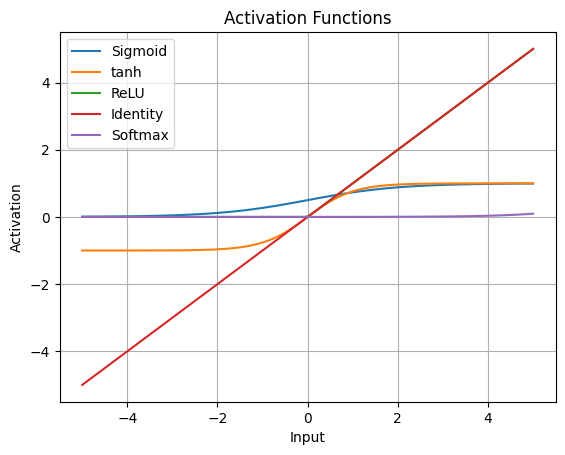

In [1]:
import numpy as np
import matplotlib.pyplot as plt

x = np.linspace(-5, 5, 100)
plt.plot(x, 1 / (1 + np.exp(-x)), label='Sigmoid')
plt.plot(x, np.tanh(x), label='tanh')
plt.plot(x, np.maximum(0, x), label='ReLU')
plt.plot(x, x, label='Identity')
plt.plot(x, np.exp(x) / np.sum(np.exp(x)), label='Softmax')

plt.xlabel('Input')
plt.ylabel('Activation')
plt.title('Activation Functions')
plt.legend()
plt.grid(True)
plt.show()

In [2]:
import numpy as np
def mp_neuron(inputs, weights, threshold):
    weighted_sum = np.dot(inputs, weights)
    output = 1 if weighted_sum >= threshold else 0
    return output
def and_not(x1, x2):
    weights = [1, -1] 
    threshold = 1   
    inputs = np.array([x1, x2])
    output = mp_neuron(inputs, weights, threshold)
    return output
print(and_not(0, 0)) 
print(and_not(1, 0))  
print(and_not(0, 1))  
print(and_not(1, 1))  


0
1
0
0


In [3]:
import numpy as np

j = int(input("Enter a Number (0-9): "))
step_function = lambda x: 1 if x >= 0 else 0

training_data = [
    {'input': [1, 1, 0, 0, 0, 0], 'label': 1},
    {'input': [1, 1, 0, 0, 0, 1], 'label': 0},
    {'input': [1, 1, 0, 0, 1, 0], 'label': 1},
    {'input': [1, 1, 0, 1, 1, 1], 'label': 0},
    {'input': [1, 1, 0, 1, 0, 0], 'label': 1},
    {'input': [1, 1, 0, 1, 0, 1], 'label': 0},
    {'input': [1, 1, 0, 1, 1, 0], 'label': 1},
    {'input': [1, 1, 0, 1, 1, 1], 'label': 0},
    {'input': [1, 1, 1, 0, 0, 0], 'label': 1},
    {'input': [1, 1, 1, 0, 0, 1], 'label': 0},
]

weights = np.array([0, 0, 0, 0, 0, 1])

for data in training_data:
    input = np.array(data['input'])
    label = data['label']
    output = step_function(np.dot(input, weights))
    error = label - output
    weights += input * error

input = np.array([int(x) for x in list('{0:06b}'.format(j))])
output = "odd" if step_function(np.dot(input, weights)) == 0 else "even"
print(j, " is ", output)



Enter a Number (0-9): 3
3  is  odd


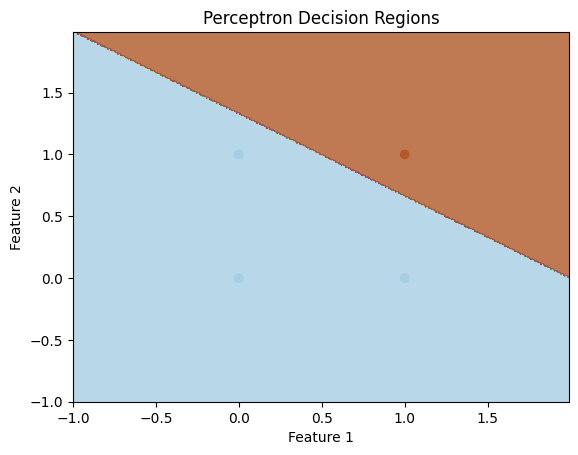

In [5]:
import numpy as np
import matplotlib.pyplot as plt


def perceptron(x, w, b):
    return np.sign(np.dot(x, w) + b)


def perceptron_learning(X, Y, eta, epochs):
    w = np.zeros(2)
    b = 0

    for epoch in range(epochs):
        for i in range(X.shape[0]):
            y_pred = perceptron(X[i], w, b)
            
            if y_pred != Y[i]:
                w += eta * Y[i] * X[i]
                b += eta * Y[i]

    return w, b


X = np.array([[0, 0], [1, 0], [0, 1], [1, 1]])
Y = np.array([-1, -1, -1, 1])

w, b = perceptron_learning(X, Y, eta=1, epochs=10)

x_min, x_max = -1,2
y_min, y_max = -1,2
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))
Z = np.array([perceptron(np.array([x, y]), w, b) for x, y in np.c_[xx.ravel(), yy.ravel()]])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=plt.cm.Paired)
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
plt.title('Perceptron Decision Regions')
plt.show()
